# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata,study_results, on = "Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# inspecting dataframe
merged_df.shape

(1893, 8)

In [4]:
# inspecting dataframe
merged_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [5]:
merged_unique_df = merged_df.drop_duplicates(subset= 'Mouse ID')
mice_sex_counter = merged_unique_df['Sex'].value_counts()
mice_sex_counter

Sex
Male      125
Female    124
Name: count, dtype: int64

In [8]:
# Checking the unique number of mice ID.
Mice_counter = merged_df['Mouse ID'].nunique()
Mice_counter


249

In [10]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
Duplicate_mouse_data = merged_df[merged_df['Mouse ID'].isin(duplicate_mouse_id)]
duplicate_mouse_id


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [13]:
# Optional: Get all the data for the duplicate mouse ID. 


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df[~merged_df['Mouse ID'].isin(duplicate_mouse_id)]
print("Cleaned DataFrame without the duplicate data:")
print(cleaned_df)

Cleaned DataFrame without the duplicate data:
     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1          

In [15]:
# Checking the number of mice in the clean DataFrame.
number_unique_mice_cleaned = cleaned_df["Mouse ID"].nunique()
print("Number of unique mice in the cleaned datasets:", number_unique_mice_cleaned)

Number of unique mice in the cleaned datasets: 249


## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Tumor_volume_data = merged_df.groupby('Drug Regimen')
# Tumor_volume_data = Tumor_volume_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

grouped_df = Tumor_volume_data['Tumor Volume (mm3)']
summary_stats_df = pd.DataFrame({
    'Mean': grouped_df.mean(),
    'Median': grouped_df.median(),
    'Variance': grouped_df.var(),
    'Standard Deviation': grouped_df.std(),
    'SEM': grouped_df.sem()
})
# Rename to give better names to understand the values in the column
summary_stats_df.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Variance Tumor Volume', \
                             'Standard Deviation Tumor Volume', 'Std.Err Tumor Volume']

summary_stats_df


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,Std.Err Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = Tumor_volume_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Assemble the resulting series into a single summary DataFrame
summary_stats_df_agg = summary_stats_agg.rename(columns={'mean': 'Mean Tumor Volume', \
                                                         'median': 'Median Tumor Volume', \
                                                         'var': 'Variance Tumor Volume',\
                                                         'std': 'Standard Deviation Tumor Volume',\
                                                         'sem': 'SStd.Err Tumor Volume'})

# Display the summary statistics DataFrame
summary_stats_df_agg

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SStd.Err Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

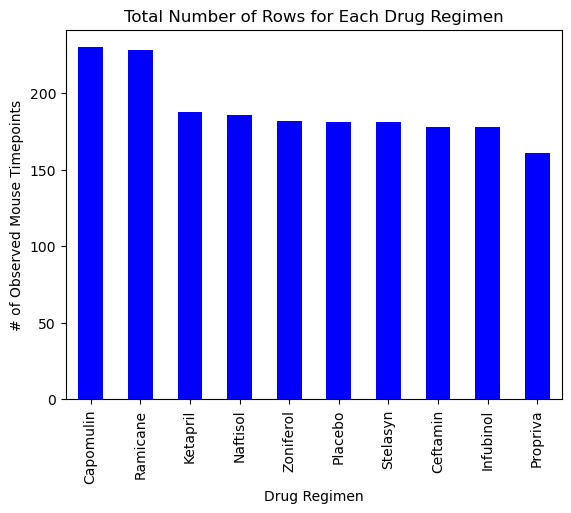

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
grouped_data = cleaned_df.groupby('Drug Regimen').size()
sorted_data = grouped_data.sort_values(ascending=False)
sorted_data.plot(kind='bar', title='Total Number of Rows for Each Drug Regimen', color= 'blue', )
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

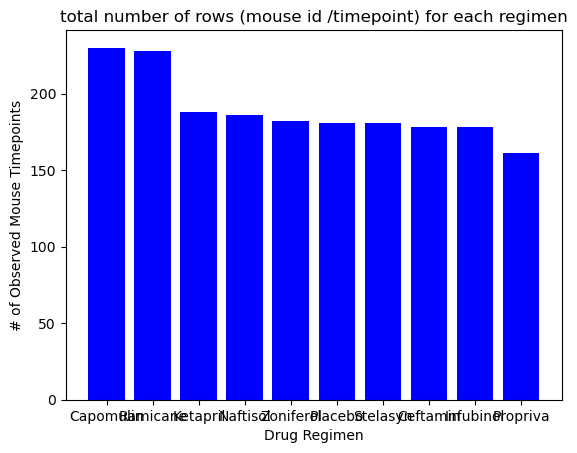

In [25]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(sorted_data.index,sorted_data, color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('total number of rows (mouse id /timepoint) for each regimen')
plt.show()


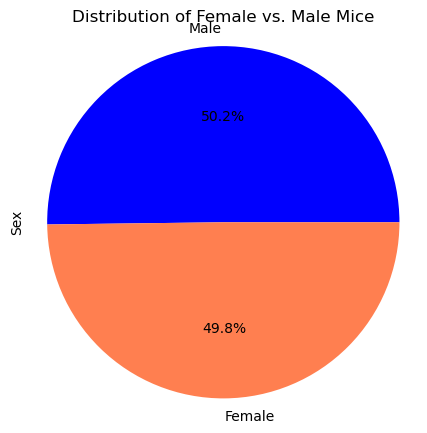

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Create a pie plot using Pandas
plt.figure(figsize=(5, 5))
mice_sex_counter.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'coral'])

plt.title('Distribution of Female vs. Male Mice')
plt.ylabel('Sex') 

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

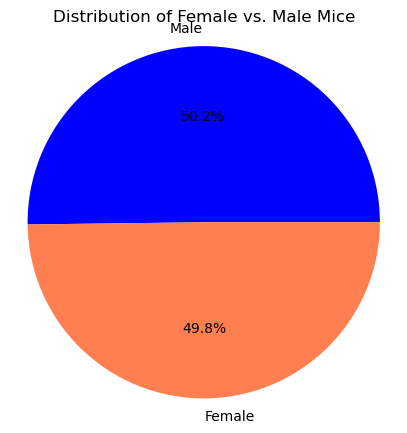

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
plt.figure(figsize=(5, 5))
plt.pie(mice_sex_counter, labels=labels, autopct='%1.1f%%', colors=['blue', 'coral'])
plt.axis('equal')
plt.title('Distribution of Female vs. Male Mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Group by 'Mouse ID' and find the maximum 'Timepoint'
max_timepoint = cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
# max_timepoint.head()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoint, cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')
merged_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [48]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume_data_list = [] # Create empty list to fill with tumor vol data (for plotting)
for treatment in treatments:
    
    # Locate the rows that correspond to the current treatment
    tumor_volume = merged_df.loc[merged_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Append the tumor volume data to the list
    tumor_volume_data_list.append(tumor_volume)
    
    # Calculate quartiles, IQR, and determine potential outliers
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    # Determine potential outliers
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    
    # Print the results
    print(f"Potential outliers for {treatment}: {outliers}")




Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


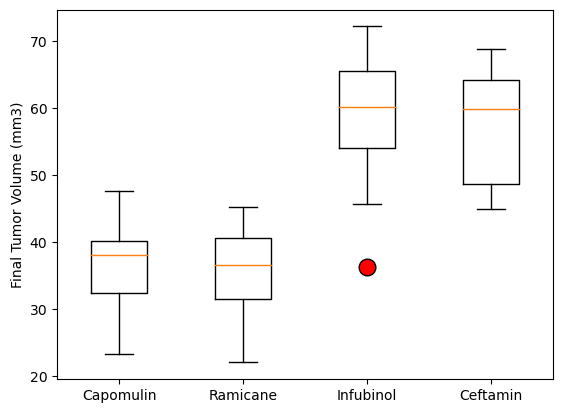

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Filter the data for the four specific treatment regimens and get the final tumor volumes
# Assuming you have already calculated the final tumor volumes for each mouse
# Store the final tumor volumes in a dictionary where the key is the treatment regimen
treatment_data = {
    'Capomulin': merged_df[merged_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)'],
    'Ramicane': merged_df[merged_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)'],
    'Infubinol': merged_df[merged_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)'],
    'Ceftamin': merged_df[merged_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']
}

# Create a box plot to visualize the distribution of the final tumor volume for each treatment group
plt.figure(figsize=(6, 6))
plt.boxplot(treatment_data.values(), labels=treatment_data.keys(), patch_artist=True, showfliers=True)
plt.title('Distribution of Final Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.grid(axis='y')
plt.show()

## Line and Scatter Plots

In [51]:
merged_df.head(25)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


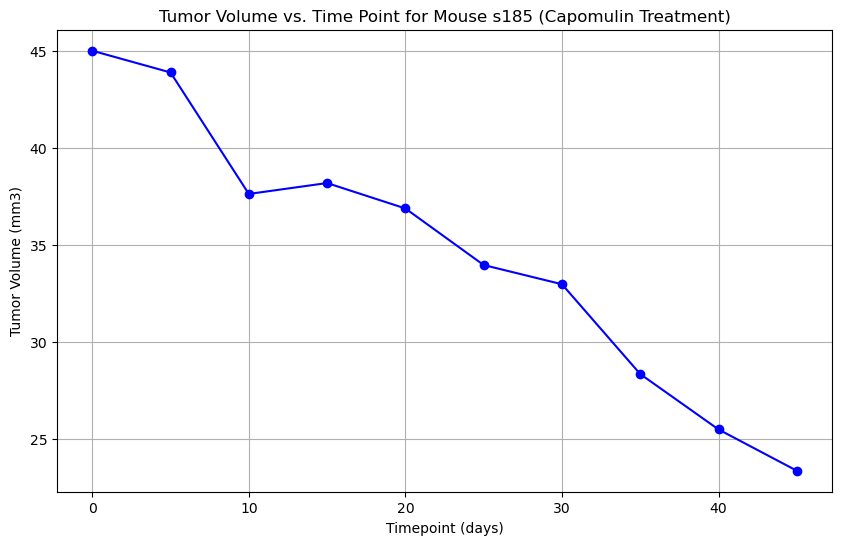

In [58]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
random_mouse_id = capomulin_data['Mouse ID'].iloc[0] #finding first occurence of Capomulin drug regimen mose
random_mouse_id
capomulin_data = cleaned_df[(cleaned_df['Drug Regimen'] == 'Capomulin') & (cleaned_df['Mouse ID'] == random_mouse_id)]

# Create a line plot of tumor volume vs. time point for the selected mouse
plt.figure(figsize=(10, 6))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o', color='b', linestyle='-')
plt.title(f'Tumor Volume vs. Time Point for Mouse {random_mouse_id} (Capomulin Treatment)')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

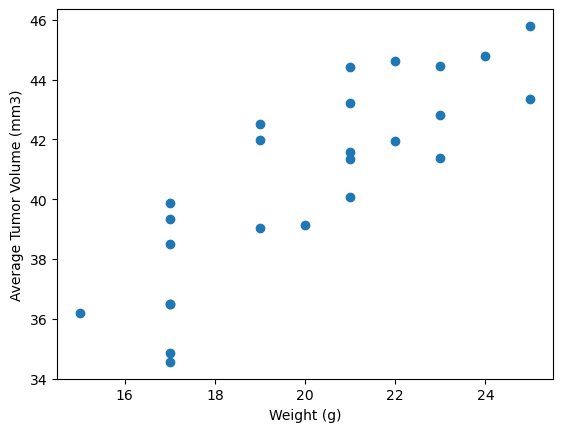

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data to include only mice on the Capomulin regimen
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']

# Group the filtered data by the mouse ID and calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()
plt.scatter(mouse_weights, average_tumor_volume, marker='o', color='b', label='Mouse Data')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

# Show the plot
plt.legend()
plt.grid(True)
plt.show()

## Correlation and Regression

In [63]:
from sklearn.linear_model import LinearRegression

In [65]:
capomulin_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


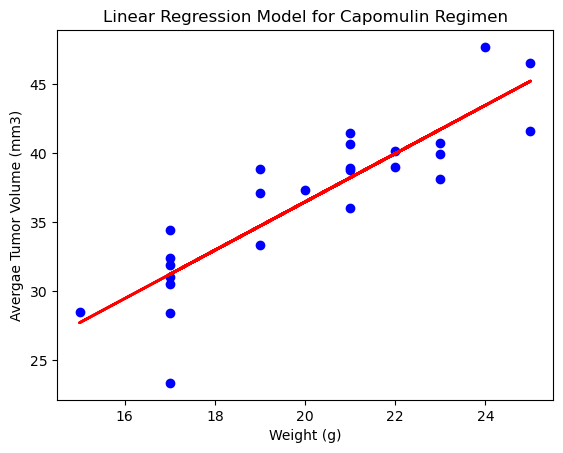

The correlation between mouse weight and the average tumor volume is: 0.876706040365812


In [72]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data_merged = merged_df[merged_df['Drug Regimen'] == 'Capomulin']
correlation = capomulin_data_merged['Weight (g)'].corr(capomulin_data_merged['Tumor Volume (mm3)'])

# Fit a linear regression model
X = capomulin_data_merged[['Weight (g)']]
y = capomulin_data_merged['Tumor Volume (mm3)']

model = LinearRegression()
model.fit(X, y)
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.xlabel('Weight (g)')
plt.ylabel('Avergae Tumor Volume (mm3)')
plt.title('Linear Regression Model for Capomulin Regimen')
plt.show()

print(f"The correlation between mouse weight and the average tumor volume is: {correlation}")